In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import Ridge,RidgeCV,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import mean_squared_error,r2_score

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\ML Datasets\StudentsPerformance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# creating a total score column
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]

In [7]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [8]:
# setting feature and target
x = df.drop(columns="total score")
y = df["total score"]

In [9]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("Train Size :", x_train.shape,y_train.shape)
print("Test Size :", x_test.shape,y_test.shape)

Train Size : (750, 8) (750,)
Test Size : (250, 8) (250,)


In [10]:
# seperating numerical and categorical features
num_features = []
cat_features = []

for i in df.columns:
    if df[i].dtypes != "object":
        if i == "total score":
            continue
        else:
            num_features.append(i)
    else:
        cat_features.append(i)

print("numerical features :", num_features)
print("categorical features :", cat_features)

numerical features : ['math score', 'reading score', 'writing score']
categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [11]:
# forming numerical and categorical pipeline
num_transformer = Pipeline(steps=[
    ("scaler",StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])

In [12]:
# using column transformer
preprocessor = ColumnTransformer(transformers=[
    ("num",num_transformer,num_features),
    ("cat",cat_transformer,cat_features)
])

In [13]:
# creating model
ridge_model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("ridge",Ridge(alpha=1))
])
elastic_net_model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("elastic_net",ElasticNet(alpha=1,l1_ratio=0.5))
])

In [14]:
ridge_model.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [15]:
elastic_net_model.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('elastic_net', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [16]:
# evaluating model
y_pred_ridge = ridge_model.predict(x_test)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)

y_pred_linear = ridge_model.predict(x_test)
mse_linear = mean_squared_error(y_test,y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test,y_pred_linear)

print("Ridge Model Evaluation :")
print(f"Root Mean Squared Error : {rmse_ridge:.4f}")
print(f"R2 Score : {r2_linear:.4f}")

print("\nElastic Net Model Evaluation :")
print(f"Root Mean Squared Error : {rmse_linear:.4f}")
print(f"R2 Score : {r2_ridge:.4f}")

Ridge Model Evaluation :
Root Mean Squared Error : 0.0275
R2 Score : 1.0000

Elastic Net Model Evaluation :
Root Mean Squared Error : 0.0275
R2 Score : 1.0000


In [17]:
# model hypertunning
param = {
    "ridge__alpha" : [1,3,5,10,15],
    "ridge__solver" : ["auto","cholesky","saga"],
    "ridge__max_iter" : [500,1000,1500,2000,2500]
}
grid = GridSearchCV(ridge_model,param_grid=param,scoring="neg_root_mean_squared_error",cv=5,n_jobs=1,verbose=2)
grid.fit(x_train,y_train)

print("Best Parameter :", grid.best_params_)
print("Best Score :", grid.best_score_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END ridge__alpha=1, ridge__max_iter=500, ridge__solver=auto; total time=   0.0s
[CV] END ridge__alpha=1, ridge__max_iter=500, ridge__solver=auto; total time=   0.0s
[CV] END ridge__alpha=1, ridge__max_iter=500, ridge__solver=auto; total time=   0.0s
[CV] END ridge__alpha=1, ridge__max_iter=500, ridge__solver=auto; total time=   0.0s
[CV] END ridge__alpha=1, ridge__max_iter=500, ridge__solver=auto; total time=   0.0s
[CV] END ridge__alpha=1, ridge__max_iter=500, ridge__solver=cholesky; total time=   0.0s
[CV] END ridge__alpha=1, ridge__max_iter=500, ridge__solver=cholesky; total time=   0.0s
[CV] END ridge__alpha=1, ridge__max_iter=500, ridge__solver=cholesky; total time=   0.0s
[CV] END ridge__alpha=1, ridge__max_iter=500, ridge__solver=cholesky; total time=   0.0s
[CV] END ridge__alpha=1, ridge__max_iter=500, ridge__solver=cholesky; total time=   0.0s
[CV] END ridge__alpha=1, ridge__max_iter=500, ridge__solver=saga; to

In [18]:
param_elastic = {
    "elastic_net__alpha" : [1,3,5,10,15],
    "elastic_net__l1_ratio" : [0,0.5,1],
    "elastic_net__max_iter" : [500,1000,1500,2000,2500]
}
grid_elastic = GridSearchCV(elastic_net_model,param_grid=param_elastic,scoring="neg_root_mean_squared_error",cv=5,n_jobs=1,verbose=2)
grid_elastic.fit(x_train,y_train)

print("Best Parameter :", grid_elastic.best_params_)
print("Best Score :", grid_elastic.best_score_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END elastic_net__alpha=1, elastic_net__l1_ratio=0, elastic_net__max_iter=500; total time=   0.0s
[CV] END elastic_net__alpha=1, elastic_net__l1_ratio=0, elastic_net__max_iter=500; total time=   0.0s
[CV] END elastic_net__alpha=1, elastic_net__l1_ratio=0, elastic_net__max_iter=500; total time=   0.0s
[CV] END elastic_net__alpha=1, elastic_net__l1_ratio=0, elastic_net__max_iter=500; total time=   0.0s
[CV] END elastic_net__alpha=1, elastic_net__l1_ratio=0, elastic_net__max_iter=500; total time=   0.0s
[CV] END elastic_net__alpha=1, elastic_net__l1_ratio=0, elastic_net__max_iter=1000; total time=   0.0s
[CV] END elastic_net__alpha=1, elastic_net__l1_ratio=0, elastic_net__max_iter=1000; total time=   0.0s
[CV] END elastic_net__alpha=1, elastic_net__l1_ratio=0, elastic_net__max_iter=1000; total time=   0.0s
[CV] END elastic_net__alpha=1, elastic_net__l1_ratio=0, elastic_net__max_iter=1000; total time=   0.0s
[CV] END elastic

In [19]:
# best model(ridge)
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
print("Model Evaluation :")
print(f"RMSE : {(np.sqrt(mean_squared_error(y_test,y_pred))):.4f}")
print(f"R2 Score : {(r2_score(y_test,y_pred)):.4f}")

Model Evaluation :
RMSE : 0.0275
R2 Score : 1.0000


In [20]:
# best model(elastic net)
best_model_elastic = grid_elastic.best_estimator_
y_pred_elastic = best_model_elastic.predict(x_test)
print("Model Evaluation :")
print(f"RMSE : {(np.sqrt(mean_squared_error(y_test,y_pred_elastic))):.4f}")
print(f"R2 Score : {(r2_score(y_test,y_pred_elastic)):.4f}")

Model Evaluation :
RMSE : 1.1393
R2 Score : 0.9994


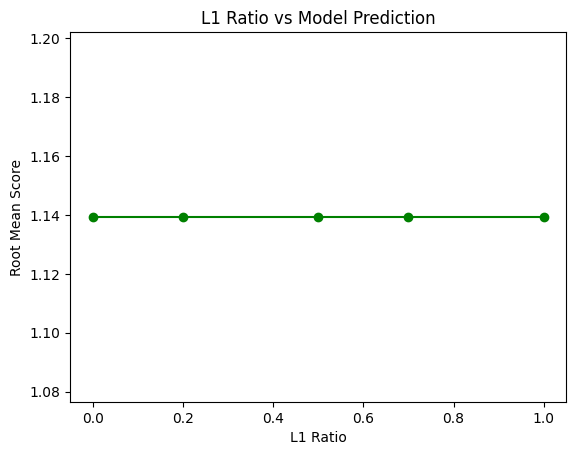

In [21]:
# graph showing change in l1 ratio and model prediction(elastic net)
l1_ratio = [0,0.2,0.5,0.7,1]
test_rmse = []
for l in l1_ratio:
    best_model_elastic.set_params(elastic_net__l1_ratio=l)
    y_pred = best_model_elastic.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    test_rmse.append(rmse)

plt.plot(l1_ratio,test_rmse,marker="o",color="green")
plt.xlabel("L1 Ratio")
plt.ylabel("Root Mean Score")
plt.title("L1 Ratio vs Model Prediction")
plt.show()

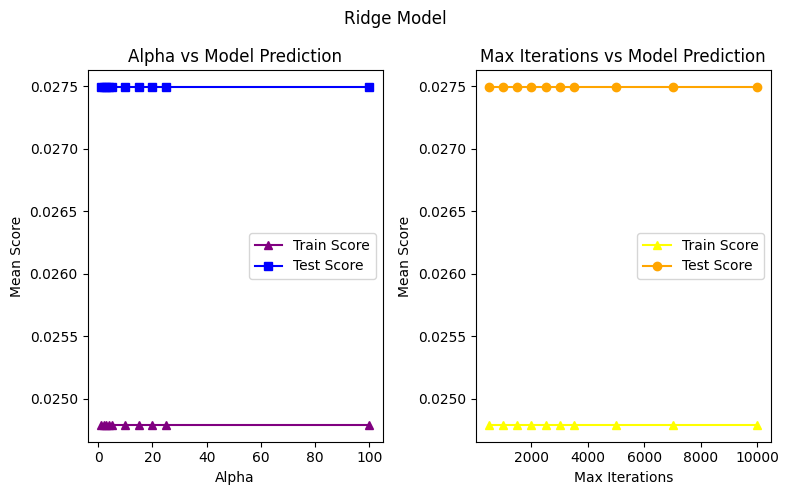

In [24]:
# graph alpha vs model prediction
alpha = [1,2,3,4,5,10,15,20,25,100]
max_iter = [500,1000,1500,2000,2500,3000,3500,5000,7000,10000]
train_rmse_ridge = []
test_rmse_ridge = []
train_iter = []
test_iter = []
for a in alpha:
    best_model_alpha = best_model.set_params(ridge__alpha=a)
    best_model_iter = best_model.set_params(ridge__max_iter=max_iter)
    y_train_pred_ridge = best_model_alpha.predict(x_train)
    y_test_pred_ridge = best_model_alpha.predict(x_test)
    y_train_iter = best_model_iter.predict(x_train)
    y_test_iter = best_model_iter.predict(x_test)
    train_ridge = np.sqrt(mean_squared_error(y_train,y_train_pred_ridge))
    test_ridge = np.sqrt(mean_squared_error(y_test,y_test_pred_ridge))
    train_i = np.sqrt(mean_squared_error(y_train,y_train_iter))
    test_i = np.sqrt(mean_squared_error(y_test,y_test_iter))
    train_rmse_ridge.append(train_ridge)
    test_rmse_ridge.append(test_ridge)
    train_iter.append(train_i)
    test_iter.append(test_i)
    
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(alpha,train_rmse_ridge,marker="^",color="purple",label="Train Score")
plt.plot(alpha,test_rmse_ridge,marker="s",color="blue",label="Test Score")
plt.xlabel("Alpha")
plt.ylabel("Mean Score")
plt.title("Alpha vs Model Prediction")
plt.legend()
plt.subplot(1,2,2)
plt.plot(max_iter,train_iter,marker="^",color="yellow",label="Train Score")
plt.plot(max_iter,test_iter,marker="o",color="orange",label="Test Score")
plt.xlabel("Max Iterations")
plt.ylabel("Mean Score")
plt.title("Max Iterations vs Model Prediction")
plt.legend()

plt.suptitle("Ridge Model")
plt.tight_layout()
plt.show()

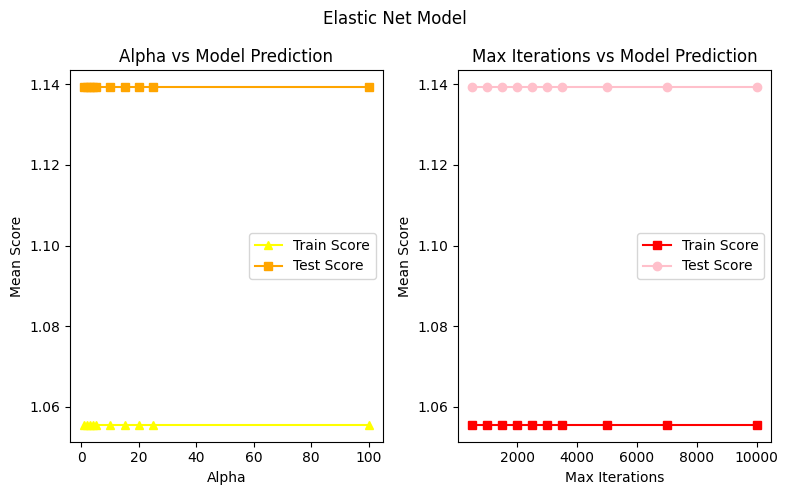

In [28]:
alpha = [1,2,3,4,5,10,15,20,25,100]
max_iter = [500,1000,1500,2000,2500,3000,3500,5000,7000,10000]
train_rmse_elastic = []
test_rmse_elastic = []
train_iter = []
test_iter = []

for a in alpha:
    best_model_alpha = best_model_elastic.set_params(elastic_net__alpha=a)
    best_model_iter = best_model_elastic.set_params(elastic_net__max_iter=max_iter)
    y_train_pred_elastic = best_model_alpha.predict(x_train)
    y_test_pred_elastic = best_model_iter.predict(x_test)
    y_train_iter = best_model_iter.predict(x_train)
    y_test_iter = best_model_iter.predict(x_test)
    train_elastic = np.sqrt(mean_squared_error(y_train,y_train_pred_elastic))
    test_elastic = np.sqrt(mean_squared_error(y_test,y_test_pred_elastic))
    train_i = np.sqrt(mean_squared_error(y_train,y_train_iter))
    test_i = np.sqrt(mean_squared_error(y_test,y_test_iter))
    train_rmse_elastic.append(train_elastic)
    test_rmse_elastic.append(test_elastic)
    train_iter.append(train_i)
    test_iter.append(test_i)
    
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(alpha,train_rmse_elastic,marker="^",color="yellow",label="Train Score")
plt.plot(alpha,test_rmse_elastic,marker="s",color="orange",label="Test Score")
plt.xlabel("Alpha")
plt.ylabel("Mean Score")
plt.title("Alpha vs Model Prediction")
plt.legend()
plt.subplot(1,2,2)
plt.plot(max_iter,train_iter,marker="s",color="red",label="Train Score")
plt.plot(max_iter,test_iter,marker="o",color="pink",label="Test Score")
plt.xlabel("Max Iterations")
plt.ylabel("Mean Score")
plt.title("Max Iterations vs Model Prediction")
plt.legend()


plt.suptitle("Elastic Net Model")
plt.tight_layout()
plt.show()